In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('plant-train.csv')

In [4]:
le=LabelEncoder()
target=df['target/label']

target=le.fit_transform(target)

y=target

In [23]:
X1=df.copy()
X=X1.drop('target/label',axis=1)
#from sklearn.preprocessing import MinMaxScaler
#df_n = df.copy()
#min_max_scaler = MinMaxScaler()
#X1.iloc[:, [0, 1, 2, 3]] = min_max_scaler.fit_transform(X1.iloc[:, [0, 1, 2, 3]])
#X1.head()

In [24]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.2, random_state = 42)

In [25]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision tree created')

Decision tree created


In [26]:
y_pred = dtree.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1]


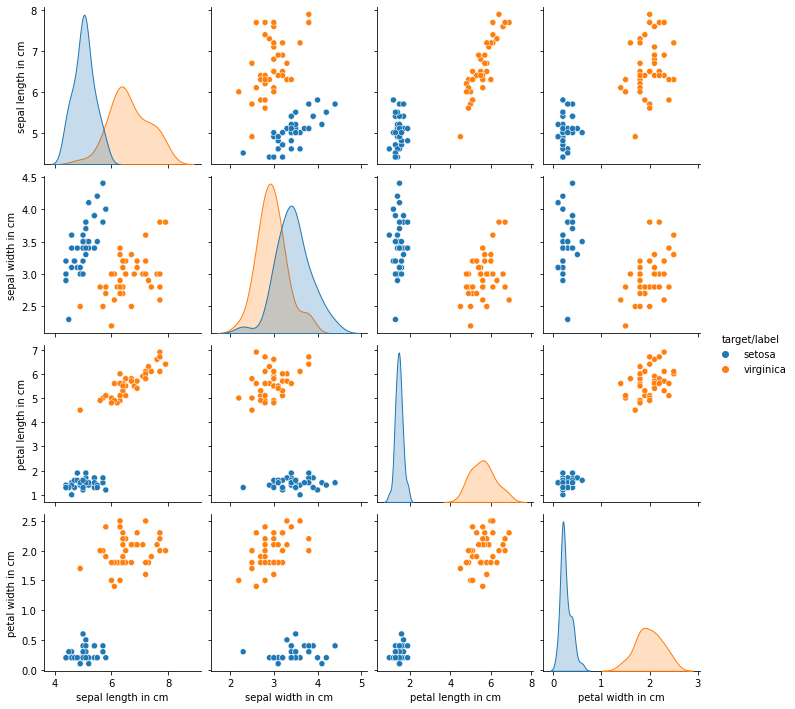

In [27]:
sns.pairplot(data=df, hue = 'target/label')

<AxesSubplot:>

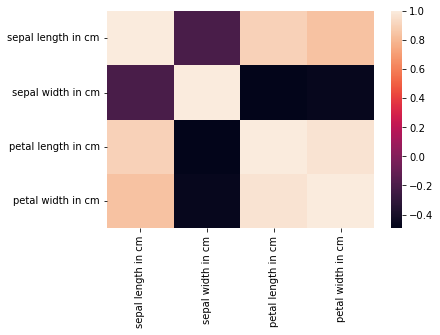

In [28]:
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Accuracy Score: 1.0')

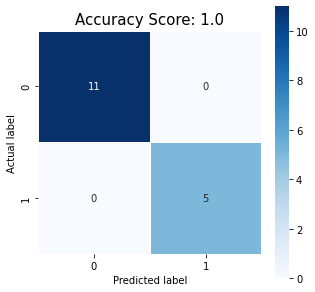

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

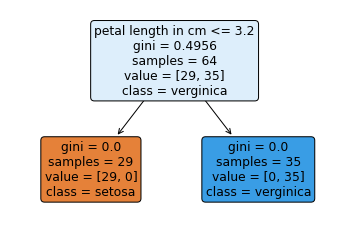

In [30]:
dec_tree = plot_tree(decision_tree=dtree, feature_names = X.columns, 
                     class_names =["setosa", "verginica"] , filled = True , precision = 4, rounded = True)